## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import shap
import time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, fbeta_score, f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from time import time
from sklearn.metrics import roc_curve, auc
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import GridSearchCV

## Dataset

In [2]:
# Lendo as bases extraidas em: https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators 

#dados = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
base_binaria = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

## Pré processamento

In [3]:
base_binaria.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [4]:
base_binaria.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [5]:
# Passando as variáveis para o formato object 
base_binaria['Diabetes_binary'] = base_binaria['Diabetes_binary'].astype('object')
base_binaria['HighBP'] = base_binaria['HighBP'].astype('object')
base_binaria['HighChol'] = base_binaria['HighChol'].astype('object')
base_binaria['CholCheck'] = base_binaria['CholCheck'].astype('object')
base_binaria['Smoker'] = base_binaria['Smoker'].astype('object')
base_binaria['Stroke'] = base_binaria['Stroke'].astype('object')
base_binaria['HeartDiseaseorAttack'] = base_binaria['HeartDiseaseorAttack'].astype('object')
base_binaria['PhysActivity'] = base_binaria['PhysActivity'].astype('object')
base_binaria['Fruits'] = base_binaria['Fruits'].astype('object')
base_binaria['Veggies'] = base_binaria['Veggies'].astype('object')
base_binaria['HvyAlcoholConsump'] = base_binaria['HvyAlcoholConsump'].astype('object')
base_binaria['AnyHealthcare'] = base_binaria['AnyHealthcare'].astype('object')
base_binaria['NoDocbcCost'] = base_binaria['NoDocbcCost'].astype('object')
base_binaria['DiffWalk'] = base_binaria['DiffWalk'].astype('object')
base_binaria['Sex'] = base_binaria['Sex'].astype('object')
base_binaria['Education'] = base_binaria['Education'].astype('object')
base_binaria['Income'] = base_binaria['Income'].astype('object')
base_binaria['GenHlth'] = base_binaria['GenHlth'].astype('object')
base_binaria['Age'] = base_binaria['Age'].astype('object')

In [6]:
base_binaria.dtypes

Diabetes_binary          object
HighBP                   object
HighChol                 object
CholCheck                object
BMI                     float64
Smoker                   object
Stroke                   object
HeartDiseaseorAttack     object
PhysActivity             object
Fruits                   object
Veggies                  object
HvyAlcoholConsump        object
AnyHealthcare            object
NoDocbcCost              object
GenHlth                  object
MentHlth                float64
PhysHlth                float64
DiffWalk                 object
Sex                      object
Age                      object
Education                object
Income                   object
dtype: object

In [7]:
# Contar o número de linhas e colunas
numero_de_linhas, numero_de_colunas = base_binaria.shape

print(f"Quantidade de linhas: {numero_de_linhas}")
print(f"Quantidade de colunas: {numero_de_colunas}")

Quantidade de linhas: 70692
Quantidade de colunas: 22


In [8]:
base_binaria.describe()

,BMI,MentHlth,PhysHlth
count,70692.000000,70692.000000,70692.000000
mean,29.856985,3.752037,5.810417
std,7.113954,8.155627,10.062261
min,12.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000
50%,29.000000,0.000000,0.000000
75%,33.000000,2.000000,6.000000
max,98.000000,30.000000,30.000000


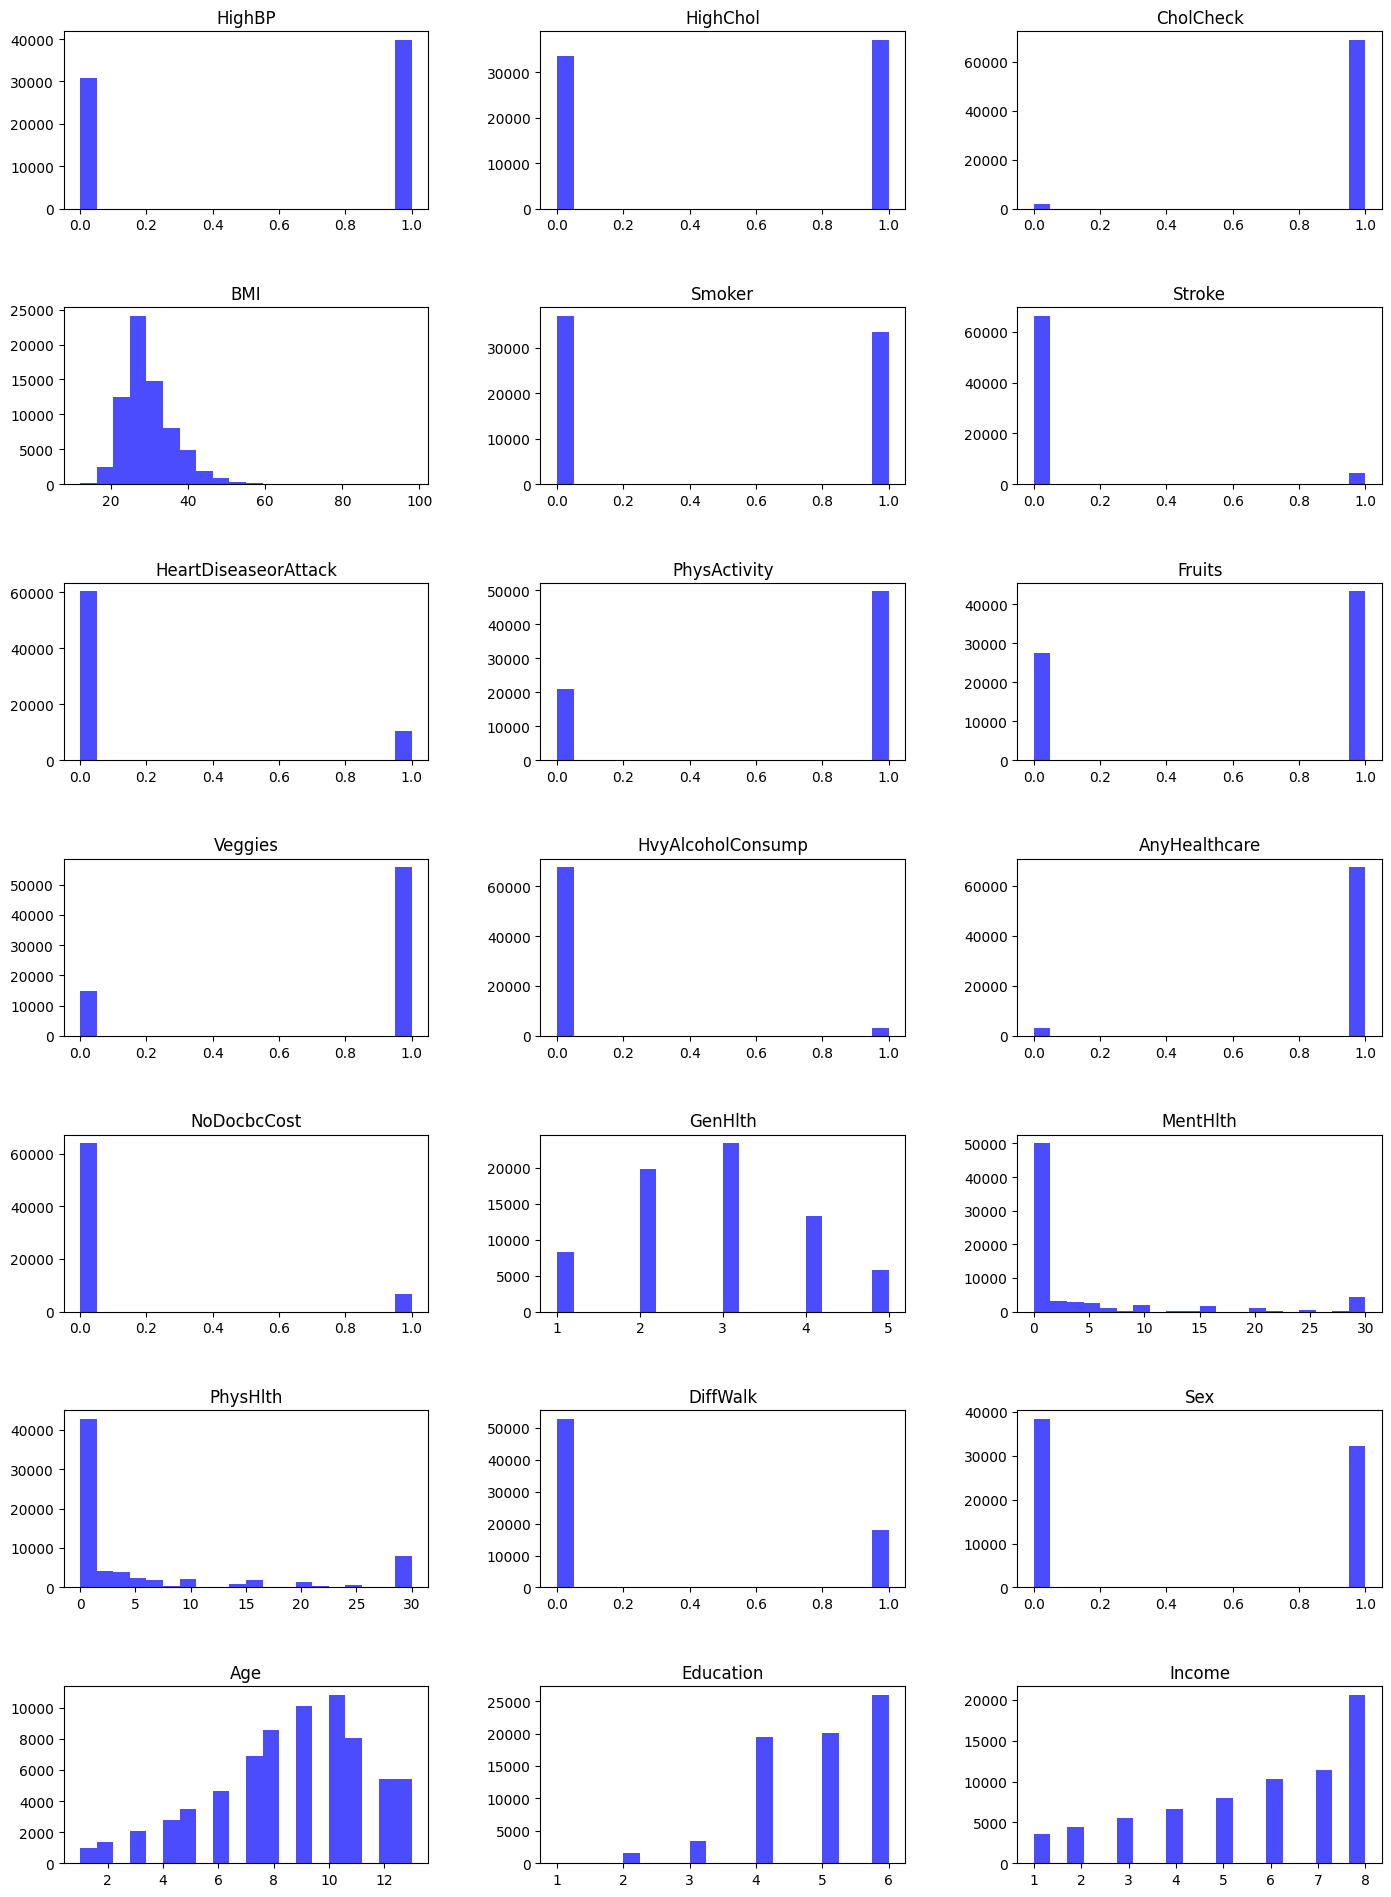

In [9]:
# Filtrar colunas excluindo a variável target
explicativas = base_binaria.drop(columns=["Diabetes_binary"])

# Plotar histogramas para cada variável explicativa
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15, 20))
fig.tight_layout(pad=5.0)

for ax, column in zip(axes.ravel(), explicativas.columns):
    ax.hist(base_binaria[column], bins=20, color='blue', alpha=0.7)
    ax.set_title(column)
    
plt.show()

C:\Users\Caio Alves\AppData\Local\Temp\ipykernel_9284\2198998222.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = explicativas.corr()


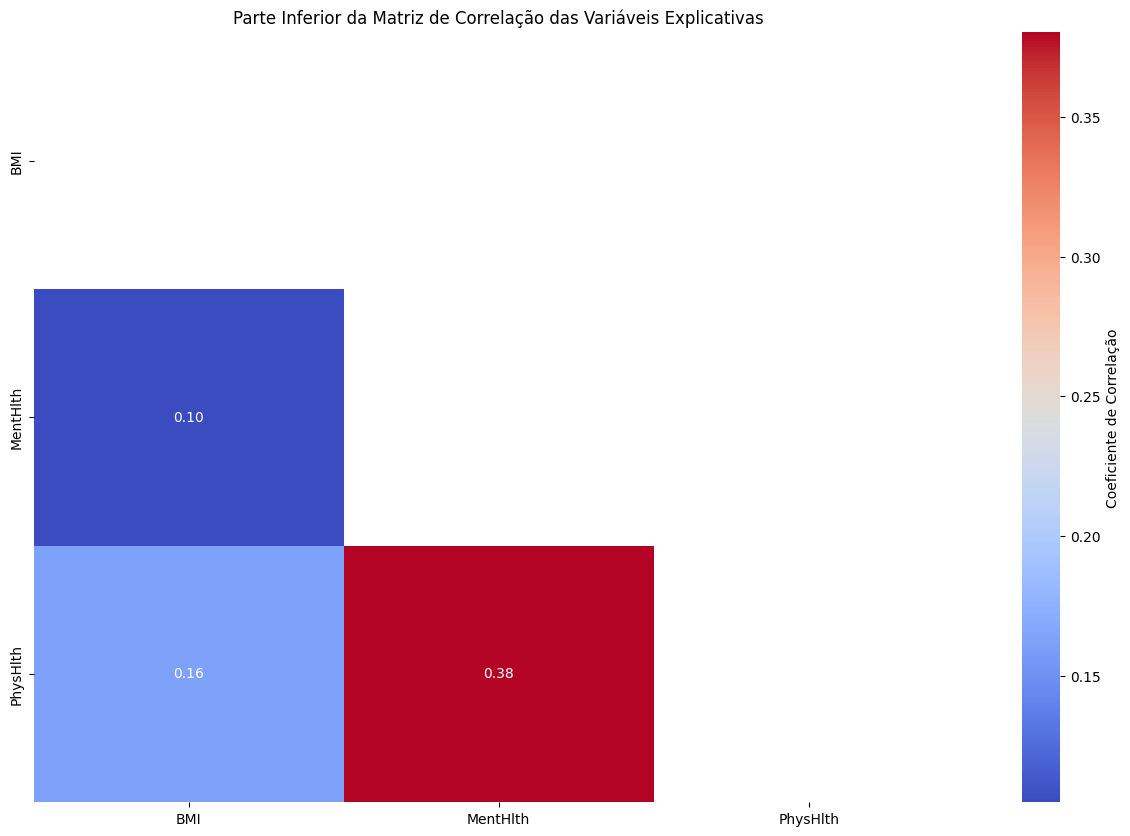

In [10]:
# Calcular a matriz de correlação apenas das variáveis explicativas
correlation_matrix = explicativas.corr()

# Máscara para esconder a parte superior da matriz de correlação
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plotar o mapa de calor da matriz de correlação apenas com a parte inferior
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Coeficiente de Correlação'})
plt.title('Parte Inferior da Matriz de Correlação das Variáveis Explicativas')
plt.show()

In [11]:
# Verificando se o dataset esta balanceado

# Tamanho do dataset
n_records = base_binaria.shape[0]

# Número de linhas com pacientes que possuem diabetes 
n_has_diabetes = base_binaria[base_binaria["Diabetes_binary"] == 1]["Diabetes_binary"].count()

# Número de linhas com pacientes que não possuem diabetes 
n_dont_have_diabetes = base_binaria[base_binaria["Diabetes_binary"] ==0]["Diabetes_binary"].count()

# percent of msisdn with 20 reais topup 
has_diabetes_percent = (n_has_diabetes / float(n_records)) * 100

# Showing results
print("Total number of records: {}".format(n_records))
print("Número de pacientes com diabetes: {}".format(n_has_diabetes))
print("Número de pacientes sem diabetes: {}".format(n_dont_have_diabetes))
print("Percentual de pacientes com diabetes: {:.2f}%".format(has_diabetes_percent))

Total number of records: 70692
Número de pacientes com diabetes: 35346
Número de pacientes sem diabetes: 35346
Percentual de pacientes com diabetes: 50.00%


### Dummy e Padronização

In [12]:
# Criar variáveis dummy para as colunas categóricas
categorical_columns = ['GenHlth', 'Education', 'Income','Age']
explicativas_dummies = pd.get_dummies(explicativas, columns=categorical_columns, drop_first=True)

# Normalizar as colunas numéricas usando Z-score
numeric_columns = ['PhysHlth', 'MentHlth', 'BMI']
scaler = StandardScaler()
explicativas_dummies[numeric_columns] = scaler.fit_transform(explicativas_dummies[numeric_columns])

# Exibir o dataframe preprocessado
explicativas_dummies.head()

C:\Users\Caio Alves\AppData\Local\Temp\ipykernel_9284\2279210527.py:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  explicativas_dummies = pd.get_dummies(explicativas, columns=categorical_columns, drop_first=True)
C:\Users\Caio Alves\AppData\Local\Temp\ipykernel_9284\2279210527.py:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  explicativas_dummies = pd.get_dummies(explicativas, columns=categorical_columns, drop_first=True)
C:\Users\Caio Alves\AppData\Local\Temp\ipykernel_9284\2279210527.py:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  explicativas_dummies = pd.get_dummies(explicativas, columns=categorical_columns, drop_first=True)
C:\Users\Caio Alves\AppData\Local\Tem

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,Age_4.0,Age_5.0,Age_6.0,Age_7.0,Age_8.0,Age_9.0,Age_10.0,Age_11.0,Age_12.0,Age_13.0
0,1.0,0.0,1.0,-0.542176,0.0,0.0,0.0,1.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
1,1.0,1.0,1.0,-0.542176,1.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0.0,0.0,1.0,-0.542176,0.0,0.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,1.0,1.0,-0.261036,1.0,0.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
4,0.0,0.0,1.0,-0.120466,1.0,0.0,0.0,1.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
explicativas_dummies.dtypes

HighBP                   object
HighChol                 object
CholCheck                object
BMI                     float64
Smoker                   object
Stroke                   object
HeartDiseaseorAttack     object
PhysActivity             object
Fruits                   object
Veggies                  object
HvyAlcoholConsump        object
AnyHealthcare            object
NoDocbcCost              object
MentHlth                float64
PhysHlth                float64
DiffWalk                 object
Sex                      object
GenHlth_2.0               uint8
GenHlth_3.0               uint8
GenHlth_4.0               uint8
GenHlth_5.0               uint8
Education_2.0             uint8
Education_3.0             uint8
Education_4.0             uint8
Education_5.0             uint8
Education_6.0             uint8
Income_2.0                uint8
Income_3.0                uint8
Income_4.0                uint8
Income_5.0                uint8
Income_6.0                uint8
Income_7

In [14]:
# Convertendo object em inteiro
# Função para transformar colunas object em inteiro
def convert_object_to_bool(df):
    object_cols = df.select_dtypes(include='object').columns
    for col in object_cols:
        df[col] = df[col].astype(int)
    return df

In [15]:
# Transformar colunas object em booleanas
explicativas_dummies = convert_object_to_bool(explicativas_dummies)

In [16]:
explicativas_dummies.dtypes

HighBP                    int32
HighChol                  int32
CholCheck                 int32
BMI                     float64
Smoker                    int32
Stroke                    int32
HeartDiseaseorAttack      int32
PhysActivity              int32
Fruits                    int32
Veggies                   int32
HvyAlcoholConsump         int32
AnyHealthcare             int32
NoDocbcCost               int32
MentHlth                float64
PhysHlth                float64
DiffWalk                  int32
Sex                       int32
GenHlth_2.0               uint8
GenHlth_3.0               uint8
GenHlth_4.0               uint8
GenHlth_5.0               uint8
Education_2.0             uint8
Education_3.0             uint8
Education_4.0             uint8
Education_5.0             uint8
Education_6.0             uint8
Income_2.0                uint8
Income_3.0                uint8
Income_4.0                uint8
Income_5.0                uint8
Income_6.0                uint8
Income_7

In [17]:
# Splitting into training and testing  
y_raw = base_binaria['Diabetes_binary']
y_raw = y_raw.astype(bool)

In [18]:
y_raw

0        False
1        False
2        False
3        False
4        False
         ...  
70687     True
70688     True
70689     True
70690     True
70691     True
Name: Diabetes_binary, Length: 70692, dtype: bool

In [19]:
# Splitting into training and testing  

# seed to use in cases where it is necessary to use random numbers and allow the reproduction of the same result in 
# multiple executions
random_seed = 42

# Divide the attributes and the response variable (if the customer recharged at least 20 reais within 90 days) 
# between training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(explicativas_dummies,
                                                    y_raw,
                                                    test_size=0.2,
                                                    random_state=random_seed)

# Split result 
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 56553 samples.
Testing set has 14139 samples.


In [20]:
import time

# Applying the GBM (Gradient Boosting Machines) model
model_gbm = GradientBoostingClassifier(random_state=random_seed)
inicio = time.time() # catching the beginning of model training
model_gbm.fit(X_train,y_train)
fim = time.time() # catching the ending of model training
y_pred = model_gbm.predict(X_test)

tempo_total = fim - inicio # calculating training duration

# Evaluating the model

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extracting TP, FN, TN, FP
TP = conf_matrix[1, 1]
FN = conf_matrix[1, 0]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]

# Calculate Sensitivity (Recall) and Specificity
sensibilidade = TP / (TP + FN)
especificidade = TN / (TN + FP)

# Calculate accuracy 
accuracy = accuracy_score(y_test, y_pred)

# Calculate rating report
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Sensibility (Recall): {sensibilidade}')
print(f'Specificity: {especificidade}')
print(f'Classification report:\n{report}')
print(f"Training time: {tempo_total} segundos")

# Calculate class probabilities for the test set
y_probs = model_gbm.predict_proba(X_test)[:, 1]  # positive class probability

# Calculate AUC
auc = roc_auc_score(y_test, y_probs)
print(f'AUC: {auc}')

# Calculate F-Score (F1 Score)
f_score = f1_score(y_test, y_pred)
print(f'F1-Score: {f_score}')

Accuracy: 0.7495579602517859
Sensibility (Recall): 0.7792594694282877
Specificity: 0.7200282087447109
Classification report:
              precision    recall  f1-score   support

       False       0.77      0.72      0.74      7090
        True       0.73      0.78      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

Training time: 6.358194828033447 segundos
AUC: 0.8265985572281557
F1-Score: 0.7562469883664901


In [21]:
from time import time

# Applying the XGBOOST model 

# Verifique se as variáveis alvo são categóricas
y_train = y_train.astype(int)
y_test = y_test.astype(int)

model_xgboost = XGBClassifier(random_state=random_seed, use_label_encoder=False)
inicio = time() # catching the beginning of model training
model_xgboost.fit(X_train,y_train)
fim = time() # catching the ending of model training
y_pred = model_xgboost.predict(X_test)

tempo_total = fim - inicio # calculating training duration 

# Evaluating the model

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extracting TP, FN, TN, FP
TP = conf_matrix[1, 1]
FN = conf_matrix[1, 0]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]

# Calculate Sensibility (Recall) and Specificity
sensibilidade = TP / (TP + FN)
especificidade = TN / (TN + FP)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate classification report
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Sensibility (Recall): {sensibilidade}')
print(f'Specificity: {especificidade}')
print(f'Classification report:\n{report}')
print(f"Training time: {tempo_total} segundos")

# Calculate probabilities of test database
y_probs = model_xgboost.predict_proba(X_test)[:, 1]  # probability of positive class

# Calculate AUC
auc = roc_auc_score(y_test, y_probs)
print(f'AUC: {auc}')

# Calculate F-Score (F1 Score)
f_score = f1_score(y_test, y_pred)  # F1 Score is the balance between precision and recall
print(f'F-Score: {f_score}')

Accuracy: 0.7484263384963576
Sensibility (Recall): 0.7889062278337353
Specificity: 0.7081805359661495
Classification report:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74      7090
           1       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

Training time: 0.4115602970123291 segundos
AUC: 0.8223040169548601
F-Score: 0.7576810409428436


In [22]:
from time import time

# Applying RandomForest model 
model_rf = RandomForestClassifier(random_state=random_seed, n_jobs=-1)
inicio = time() # catching the beginning 
model_rf.fit(X_train,y_train)
fim = time() # catching the ending 
y_pred = model_rf.predict(X_test)

tempo_total = fim - inicio # training time 

# Evalute the model 

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extracting TP, FN, TN, FP
TP = conf_matrix[1, 1]
FN = conf_matrix[1, 0]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]

# Calculate Sensibility (Recall) and Specificity
sensibilidade = TP / (TP + FN)
especificidade = TN / (TN + FP)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate classification report
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Sensibility (Recall): {sensibilidade}')
print(f'Specificity: {especificidade}')
print(f'Classification report:\n{report}')
print(f"Training time: {tempo_total} segundos")

# Calculate probabilities of test database
y_probs = model_rf.predict_proba(X_test)[:, 1]  # probability of positive class

# Calculate AUC
auc = roc_auc_score(y_test, y_probs)
print(f'AUC: {auc}')

# Calculate F-Score (F1 Score)
f_score = f1_score(y_test, y_pred)  # F1 Score is the balance between precision and recall
print(f'F-Score: {f_score}')

Accuracy: 0.734422519272933
Sensibility (Recall): 0.7767059157327281
Specificity: 0.6923836389280676
Classification report:
              precision    recall  f1-score   support

           0       0.76      0.69      0.72      7090
           1       0.72      0.78      0.74      7049

    accuracy                           0.73     14139
   macro avg       0.74      0.73      0.73     14139
weighted avg       0.74      0.73      0.73     14139

Training time: 2.713216543197632 segundos
AUC: 0.806059877852814
F-Score: 0.7446446786807209


In [23]:
from time import time

#Applying Adaboost model 
model_adaboost = AdaBoostClassifier(random_state=random_seed)
inicio = time() # catching the beginning 
model_adaboost.fit(X_train,y_train)
fim = time() # catching the ending 
y_pred = model_adaboost.predict(X_test)

tempo_total = fim - inicio # training time 

# Evalute the model 

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extracting TP, FN, TN, FP
TP = conf_matrix[1, 1]
FN = conf_matrix[1, 0]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]

# Calculate Sensibility (Recall) and Specificity
sensibilidade = TP / (TP + FN)
especificidade = TN / (TN + FP)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate classification report
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Sensibility (Recall): {sensibilidade}')
print(f'Specificity: {especificidade}')
print(f'Classification report:\n{report}')
print(f"Training time: {tempo_total} segundos")

# Calculate probabilities of test database
y_probs = model_adaboost.predict_proba(X_test)[:, 1]  # probability of positive class

# Calculate AUC
auc = roc_auc_score(y_test, y_probs)
print(f'AUC: {auc}')

# Calculate F-Score (F1 Score)
f_score = f1_score(y_test, y_pred) # F1 Score is the balance between precision and recall
print(f'F-Score: {f_score}')

Accuracy: 0.7470118113020723
Sensibility (Recall): 0.759682224428997
Specificity: 0.7344146685472497
Classification report:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74      7090
           1       0.74      0.76      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

Training time: 2.130039930343628 segundos
AUC: 0.8254854643327855
F-Score: 0.7496325330720236


In [24]:
from time import time

#Applying logistic regression    
model_log = clf_A = LogisticRegression(random_state=random_seed)
inicio = time() # catching the beginning 
model_log.fit(X_train,y_train)
fim = time() # catching the ending 
y_pred = model_log.predict(X_test)

tempo_total = fim - inicio # training time 

# Evalute the model  

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extracting TP, FN, TN, FP
TP = conf_matrix[1, 1]
FN = conf_matrix[1, 0]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]

# Calculate Sensibility (Recall) and Specificity
sensibilidade = TP / (TP + FN)
especificidade = TN / (TN + FP)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate classification report
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Sensibility (Recall): {sensibilidade}')
print(f'Specificity: {especificidade}')
print(f'Classification report:\n{report}')
print(f"Training time: {tempo_total} segundos")

# Calculate probabilities of test database
y_probs = model_log.predict_proba(X_test)[:, 1]  # probability of positive class

# Calculate AUC
auc = roc_auc_score(y_test, y_probs)
print(f'AUC: {auc}')

# Calculate F-Score (F1 Score)
f_score = f1_score(y_test, y_pred)  # F1 Score is the balance between precision and recall
print(f'F-Score: {f_score}')

Accuracy: 0.7503359502086427
Sensibility (Recall): 0.7775571002979146
Specificity: 0.7232722143864598
Classification report:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74      7090
           1       0.74      0.78      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

Training time: 0.8877427577972412 segundos
AUC: 0.8268980425356176
F-Score: 0.7564173337013524


c:\Users\Caio Alves\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Comparando os modelos

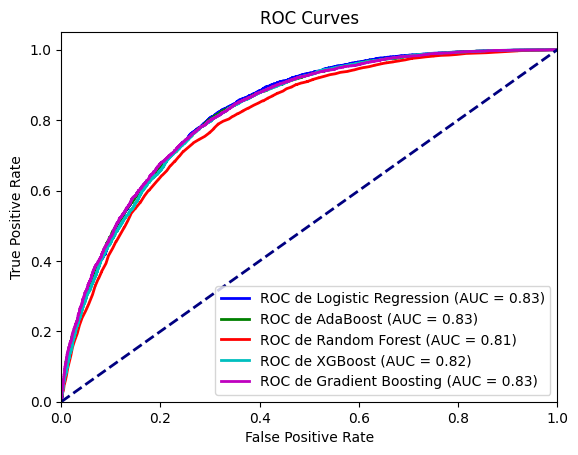

In [25]:
import time
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Initialize figure
plt.figure()

# List of models and their respective names for easy reference and iteration
modelos = [
    (model_log, 'Logistic Regression'),
    (model_adaboost, 'AdaBoost'),
    (model_rf, 'Random Forest'),
    (model_xgboost, 'XGBoost'),
    (model_gbm, 'Gradient Boosting')
]

# Colors for ROC curve 
colors = ['b', 'g', 'r', 'c', 'm']

# Iterate over each model, calculate the ROC curve and plot
for (modelo, nome_modelo), color in zip(modelos, colors):
    # Calculate class probabilities for the test set
    y_probs_modelo = modelo.predict_proba(X_test)[:, 1]  # probability of positive class
    
    # Calculate ROC curve 
    fpr, tpr, _ = roc_curve(y_test, y_probs_modelo)
    
    # Calculate the area under the ROC curve
    roc_auc = auc(fpr, tpr)
    
    # Plota ROC curve 
    plt.plot(fpr, tpr, color=color, lw=2, label='ROC de %s (AUC = %0.2f)' % (nome_modelo, roc_auc))

# Add "chance" guideline (random classification)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Final adjustments to the chart
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

## Tunning GBM

In [26]:
import time
from sklearn.metrics import make_scorer, recall_score

# Definindo os parâmetros para tuning
parametros = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Criando o objeto GridSearchCV com sensibilidade como métrica de avaliação
scorer = make_scorer(recall_score, pos_label=1)

grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=random_seed),
                           param_grid=parametros,
                           scoring=scorer,
                           n_jobs=-1,
                           cv=3,
                           verbose=1)

# Executando o Grid Search
inicio_gs = time.time()
grid_search.fit(X_train, y_train)
fim_gs = time.time()

# Tempo total de execução do Grid Search
tempo_total_gs = fim_gs - inicio_gs
print(f"Tempo total para o Grid Search: {tempo_total_gs} segundos")

# Melhores parâmetros e melhor sensibilidade
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor Sensibilidade: ", grid_search.best_score_)

# Modelo com os melhores parâmetros
model_gbm_optimized = grid_search.best_estimator_

# Treinando o modelo otimizado com o conjunto de treino
inicio_opt = time.time()
model_gbm_optimized.fit(X_train, y_train)
fim_opt = time.time()
print(f"Tempo de treinamento do modelo otimizado: {fim_opt - inicio_opt} segundos")

# Predições com o modelo otimizado
y_pred_opt = model_gbm_optimized.predict(X_test)
y_probs_opt = model_gbm_optimized.predict_proba(X_test)[:, 1]

# Avaliação do modelo otimizado
accuracy_opt = accuracy_score(y_test, y_pred_opt)
recall_opt = recall_score(y_test, y_pred_opt)
auc_opt = roc_auc_score(y_test, y_probs_opt)
f_score_opt = f1_score(y_test, y_pred_opt)

# Matriz de confusão para calcular a especificidade
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_opt).ravel()
specificity_opt = tn / (tn + fp)

print(f'Accuracy otimizado: {accuracy_opt}')
print(f'Sensibilidade otimizada: {recall_opt}')
print(f'AUC otimizado: {auc_opt}')
print(f'F-Score otimizado: {f_score_opt}')
print(f'Especificidade otimizada: {specificity_opt}')

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Tempo total para o Grid Search: 1353.909107208252 segundos
Melhores parâmetros: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 300}
Melhor Sensibilidade:  0.7879634402663837
Tempo de treinamento do modelo otimizado: 18.84567356109619 segundos
Accuracy otimizado: 0.7552160690289271
Sensibilidade otimizada: 0.7930202865654703
AUC otimizado: 0.8302440242501562
F-Score otimizado: 0.7636090430981489
Especificidade otimizada: 0.7176304654442878


In [27]:
# Calculate classification report
report = classification_report(y_test, y_pred_opt)
print(f'Classification report:\n{report}')

Classification report:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      7090
           1       0.74      0.79      0.76      7049

    accuracy                           0.76     14139
   macro avg       0.76      0.76      0.75     14139
weighted avg       0.76      0.76      0.75     14139



### Tunning XGBOOST

In [28]:
import time
from sklearn.metrics import make_scorer, recall_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Definindo os parâmetros para tuning
parametros = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Criando o objeto GridSearchCV com sensibilidade como métrica de avaliação
scorer = make_scorer(recall_score, pos_label=1)

grid_search = GridSearchCV(estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=random_seed),
                           param_grid=parametros,
                           scoring=scorer,
                           n_jobs=-1,
                           cv=3,
                           verbose=1)

# Executando o Grid Search
inicio_gs = time.time()
grid_search.fit(X_train, y_train)
fim_gs = time.time()

# Tempo total de execução do Grid Search
tempo_total_gs = fim_gs - inicio_gs
print(f"Tempo total para o Grid Search: {tempo_total_gs} segundos")

# Melhores parâmetros e melhor sensibilidade
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor Sensibilidade: ", grid_search.best_score_)

# Modelo com os melhores parâmetros
model_xgb_optimized = grid_search.best_estimator_

# Treinando o modelo otimizado com o conjunto de treino
inicio_opt = time.time()
model_xgb_optimized.fit(X_train, y_train)
fim_opt = time.time()
print(f"Tempo de treinamento do modelo otimizado: {fim_opt - inicio_opt} segundos")

# Predições com o modelo otimizado
y_pred_opt = model_xgb_optimized.predict(X_test)
y_probs_opt = model_xgb_optimized.predict_proba(X_test)[:, 1]

# Avaliação do modelo otimizado
accuracy_opt = accuracy_score(y_test, y_pred_opt)
recall_opt = recall_score(y_test, y_pred_opt)
auc_opt = roc_auc_score(y_test, y_probs_opt)
f_score_opt = f1_score(y_test, y_pred_opt)

# Matriz de confusão para calcular a especificidade
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_opt).ravel()
specificity_opt = tn / (tn + fp)

print(f'Accuracy otimizado: {accuracy_opt}')
print(f'Sensibilidade otimizada: {recall_opt}')
print(f'Especificidade otimizada: {specificity_opt}')
print(f'AUC otimizado: {auc_opt}')
print(f'F-Score otimizado: {f_score_opt}')

# Calculate classification report
report = classification_report(y_test, y_pred_opt)
print(f'Classification report:\n{report}')

Fitting 3 folds for each of 486 candidates, totalling 1458 fits
Tempo total para o Grid Search: 760.9112503528595 segundos
Melhores parâmetros: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 1.0}
Melhor Sensibilidade:  0.7905431790853523
Tempo de treinamento do modelo otimizado: 1.2290980815887451 segundos
Accuracy otimizado: 0.7535893627554989
Sensibilidade otimizada: 0.7930202865654703
Especificidade otimizada: 0.7143864598025388
AUC otimizado: 0.8295900787976008
F-Score otimizado: 0.7624113475177305
Classification report:
              precision    recall  f1-score   support

           0       0.78      0.71      0.74      7090
           1       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.76      0.75      0.75     14139
weighted avg       0.76      0.75      0.75     14139



### Tunning Adaboost

In [29]:
import time
from sklearn.metrics import make_scorer, recall_score, accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Definindo os parâmetros para tuning
parametros = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Criando o objeto GridSearchCV com sensibilidade como métrica de avaliação
scorer = make_scorer(recall_score, pos_label=1)

grid_search = GridSearchCV(estimator=AdaBoostClassifier(random_state=random_seed),
                           param_grid=parametros,
                           scoring=scorer,
                           n_jobs=-1,
                           cv=3,
                           verbose=1)

# Executando o Grid Search
inicio_gs = time.time()
grid_search.fit(X_train, y_train)
fim_gs = time.time()

# Tempo total de execução do Grid Search
tempo_total_gs = fim_gs - inicio_gs
print(f"Tempo total para o Grid Search: {tempo_total_gs} segundos")

# Melhores parâmetros e melhor sensibilidade
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor Sensibilidade: ", grid_search.best_score_)

# Modelo com os melhores parâmetros
model_ada_optimized = grid_search.best_estimator_

# Treinando o modelo otimizado com o conjunto de treino
inicio_opt = time.time()
model_ada_optimized.fit(X_train, y_train)
fim_opt = time.time()
print(f"Tempo de treinamento do modelo otimizado: {fim_opt - inicio_opt} segundos")

# Predições com o modelo otimizado
y_pred_opt = model_ada_optimized.predict(X_test)
y_probs_opt = model_ada_optimized.predict_proba(X_test)[:, 1]

# Avaliação do modelo otimizado
accuracy_opt = accuracy_score(y_test, y_pred_opt)
recall_opt = recall_score(y_test, y_pred_opt)
auc_opt = roc_auc_score(y_test, y_probs_opt)
f_score_opt = f1_score(y_test, y_pred_opt)

# Matriz de confusão para calcular a especificidade
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_opt).ravel()
specificity_opt = tn / (tn + fp)

print(f'Accuracy otimizado: {accuracy_opt}')
print(f'Sensibilidade otimizada: {recall_opt}')
print(f'Especificidade otimizada: {specificity_opt}')
print(f'AUC otimizado: {auc_opt}')
print(f'F-Score otimizado: {f_score_opt}')

# Calculate classification report
report = classification_report(y_test, y_pred_opt)
print(f'Classification report:\n{report}')

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Tempo total para o Grid Search: 97.59718990325928 segundos
Melhores parâmetros: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 200}
Melhor Sensibilidade:  0.7689506654388955
Tempo de treinamento do modelo otimizado: 8.440385580062866 segundos
Accuracy otimizado: 0.7513968456043567
Sensibilidade otimizada: 0.7725918570009931
Especificidade otimizada: 0.7303244005641749
AUC otimizado: 0.8283651453726794
F-Score otimizado: 0.7560213784965641
Classification report:
              precision    recall  f1-score   support

           0       0.76      0.73      0.75      7090
           1       0.74      0.77      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



### Tunning Random Forest

In [30]:
import time
from sklearn.metrics import make_scorer, recall_score, accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definindo os parâmetros para tuning
parametros = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Criando o objeto GridSearchCV com sensibilidade como métrica de avaliação
scorer = make_scorer(recall_score, pos_label=1)

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=random_seed),
                           param_grid=parametros,
                           scoring=scorer,
                           n_jobs=-1,
                           cv=3,
                           verbose=1)

# Executando o Grid Search
inicio_gs = time.time()
grid_search.fit(X_train, y_train)
fim_gs = time.time()

# Tempo total de execução do Grid Search
tempo_total_gs = fim_gs - inicio_gs
print(f"Tempo total para o Grid Search: {tempo_total_gs} segundos")

# Melhores parâmetros e melhor sensibilidade
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor Sensibilidade: ", grid_search.best_score_)

# Modelo com os melhores parâmetros
model_rf_optimized = grid_search.best_estimator_

# Treinando o modelo otimizado com o conjunto de treino
inicio_opt = time.time()
model_rf_optimized.fit(X_train, y_train)
fim_opt = time.time()
print(f"Tempo de treinamento do modelo otimizado: {fim_opt - inicio_opt} segundos")

# Predições com o modelo otimizado
y_pred_opt = model_rf_optimized.predict(X_test)
y_probs_opt = model_rf_optimized.predict_proba(X_test)[:, 1]

# Avaliação do modelo otimizado
accuracy_opt = accuracy_score(y_test, y_pred_opt)
recall_opt = recall_score(y_test, y_pred_opt)
auc_opt = roc_auc_score(y_test, y_probs_opt)
f_score_opt = f1_score(y_test, y_pred_opt)

# Matriz de confusão para calcular a especificidade
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_opt).ravel()
specificity_opt = tn / (tn + fp)

print(f'Accuracy otimizado: {accuracy_opt}')
print(f'Sensibilidade otimizada: {recall_opt}')
print(f'Especificidade otimizada: {specificity_opt}')
print(f'AUC otimizado: {auc_opt}')
print(f'F-Score otimizado: {f_score_opt}')

# Calculate classification report
report = classification_report(y_test, y_pred_opt)
print(f'Classification report:\n{report}')

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Tempo total para o Grid Search: 2265.6745505332947 segundos
Melhores parâmetros: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Melhor Sensibilidade:  0.7889882639106373
Tempo de treinamento do modelo otimizado: 23.41681170463562 segundos
Accuracy otimizado: 0.7446071150717872
Sensibilidade otimizada: 0.7904667328699106
Especificidade otimizada: 0.6990126939351199
AUC otimizado: 0.8212124337775808
F-Score otimizado: 0.7552694002033209
Classification report:
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      7090
           1       0.72      0.79      0.76      7049

    accuracy                           0.74     14139
   macro avg       0.75      0.74      0.74     14139
weighted avg       0.75      0.74      0.74     14139



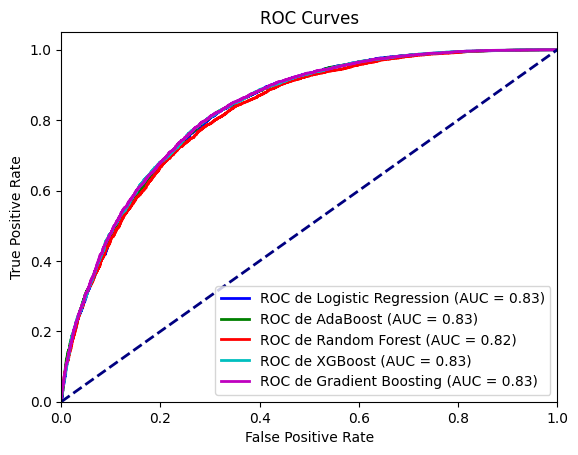

In [36]:
import time
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Initialize figure
plt.figure()

# List of models and their respective names for easy reference and iteration
modelos = [
    (model_log, 'Logistic Regression'),
    (model_ada_optimized, 'AdaBoost'),
    (model_rf_optimized, 'Random Forest'),
    (model_xgb_optimized, 'XGBoost'),
    (model_gbm_optimized, 'Gradient Boosting')
]

# Colors for ROC curve 
colors = ['b', 'g', 'r', 'c', 'm']

# Iterate over each model, calculate the ROC curve and plot
for (modelo, nome_modelo), color in zip(modelos, colors):
    # Calculate class probabilities for the test set
    y_probs_modelo = modelo.predict_proba(X_test)[:, 1]  # probability of positive class
    
    # Calculate ROC curve 
    fpr, tpr, _ = roc_curve(y_test, y_probs_modelo)
    
    # Calculate the area under the ROC curve
    roc_auc = auc(fpr, tpr)
    
    # Plota ROC curve 
    plt.plot(fpr, tpr, color=color, lw=2, label='ROC de %s (AUC = %0.2f)' % (nome_modelo, roc_auc))

# Add "chance" guideline (random classification)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Final adjustments to the chart
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

### Feature Importance (NÃO FIZ POR ESSE MÉTODO)

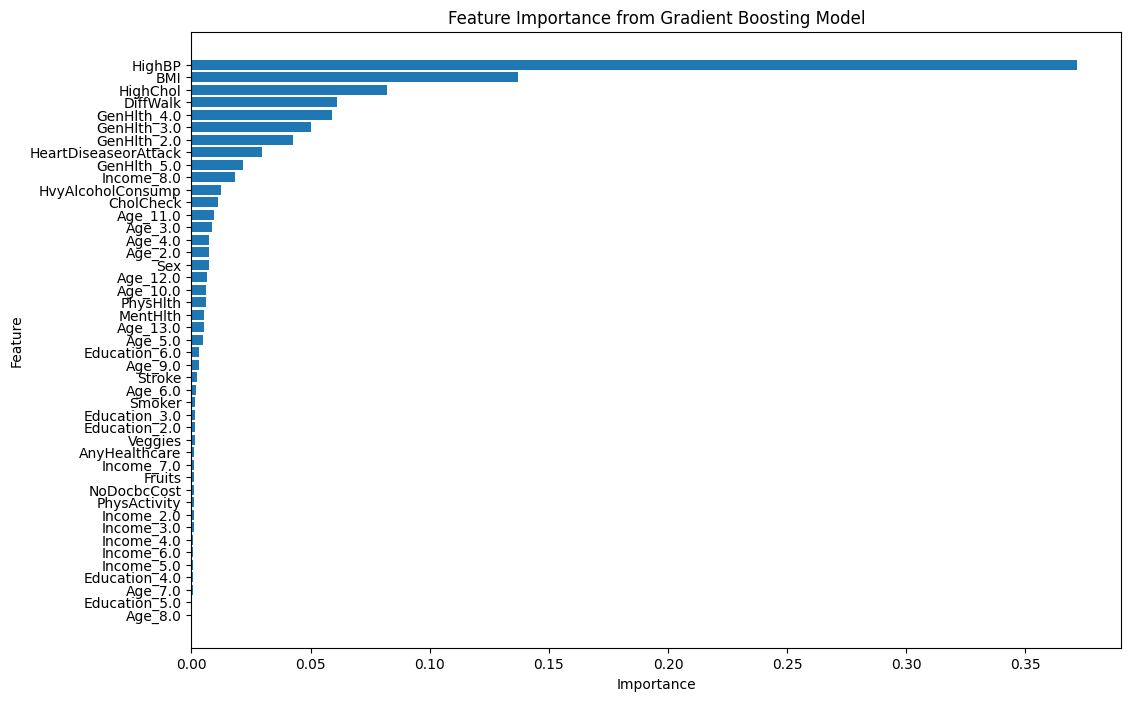

In [31]:
# Feature Importance

# Get feature importances
feature_importances = model_gbm_optimized.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Gradient Boosting Model')
plt.gca().invert_yaxis()
plt.show()

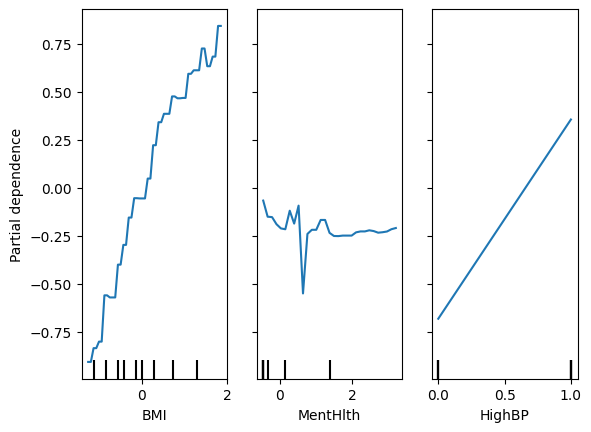

In [32]:
# Geração do PDP para as variáveis de interesse
features = ['BMI', 'MentHlth','HighBP']  # adicione outras variáveis se necessário
display = PartialDependenceDisplay.from_estimator(model_gbm_optimized, X_train, features, grid_resolution=50)
plt.show()

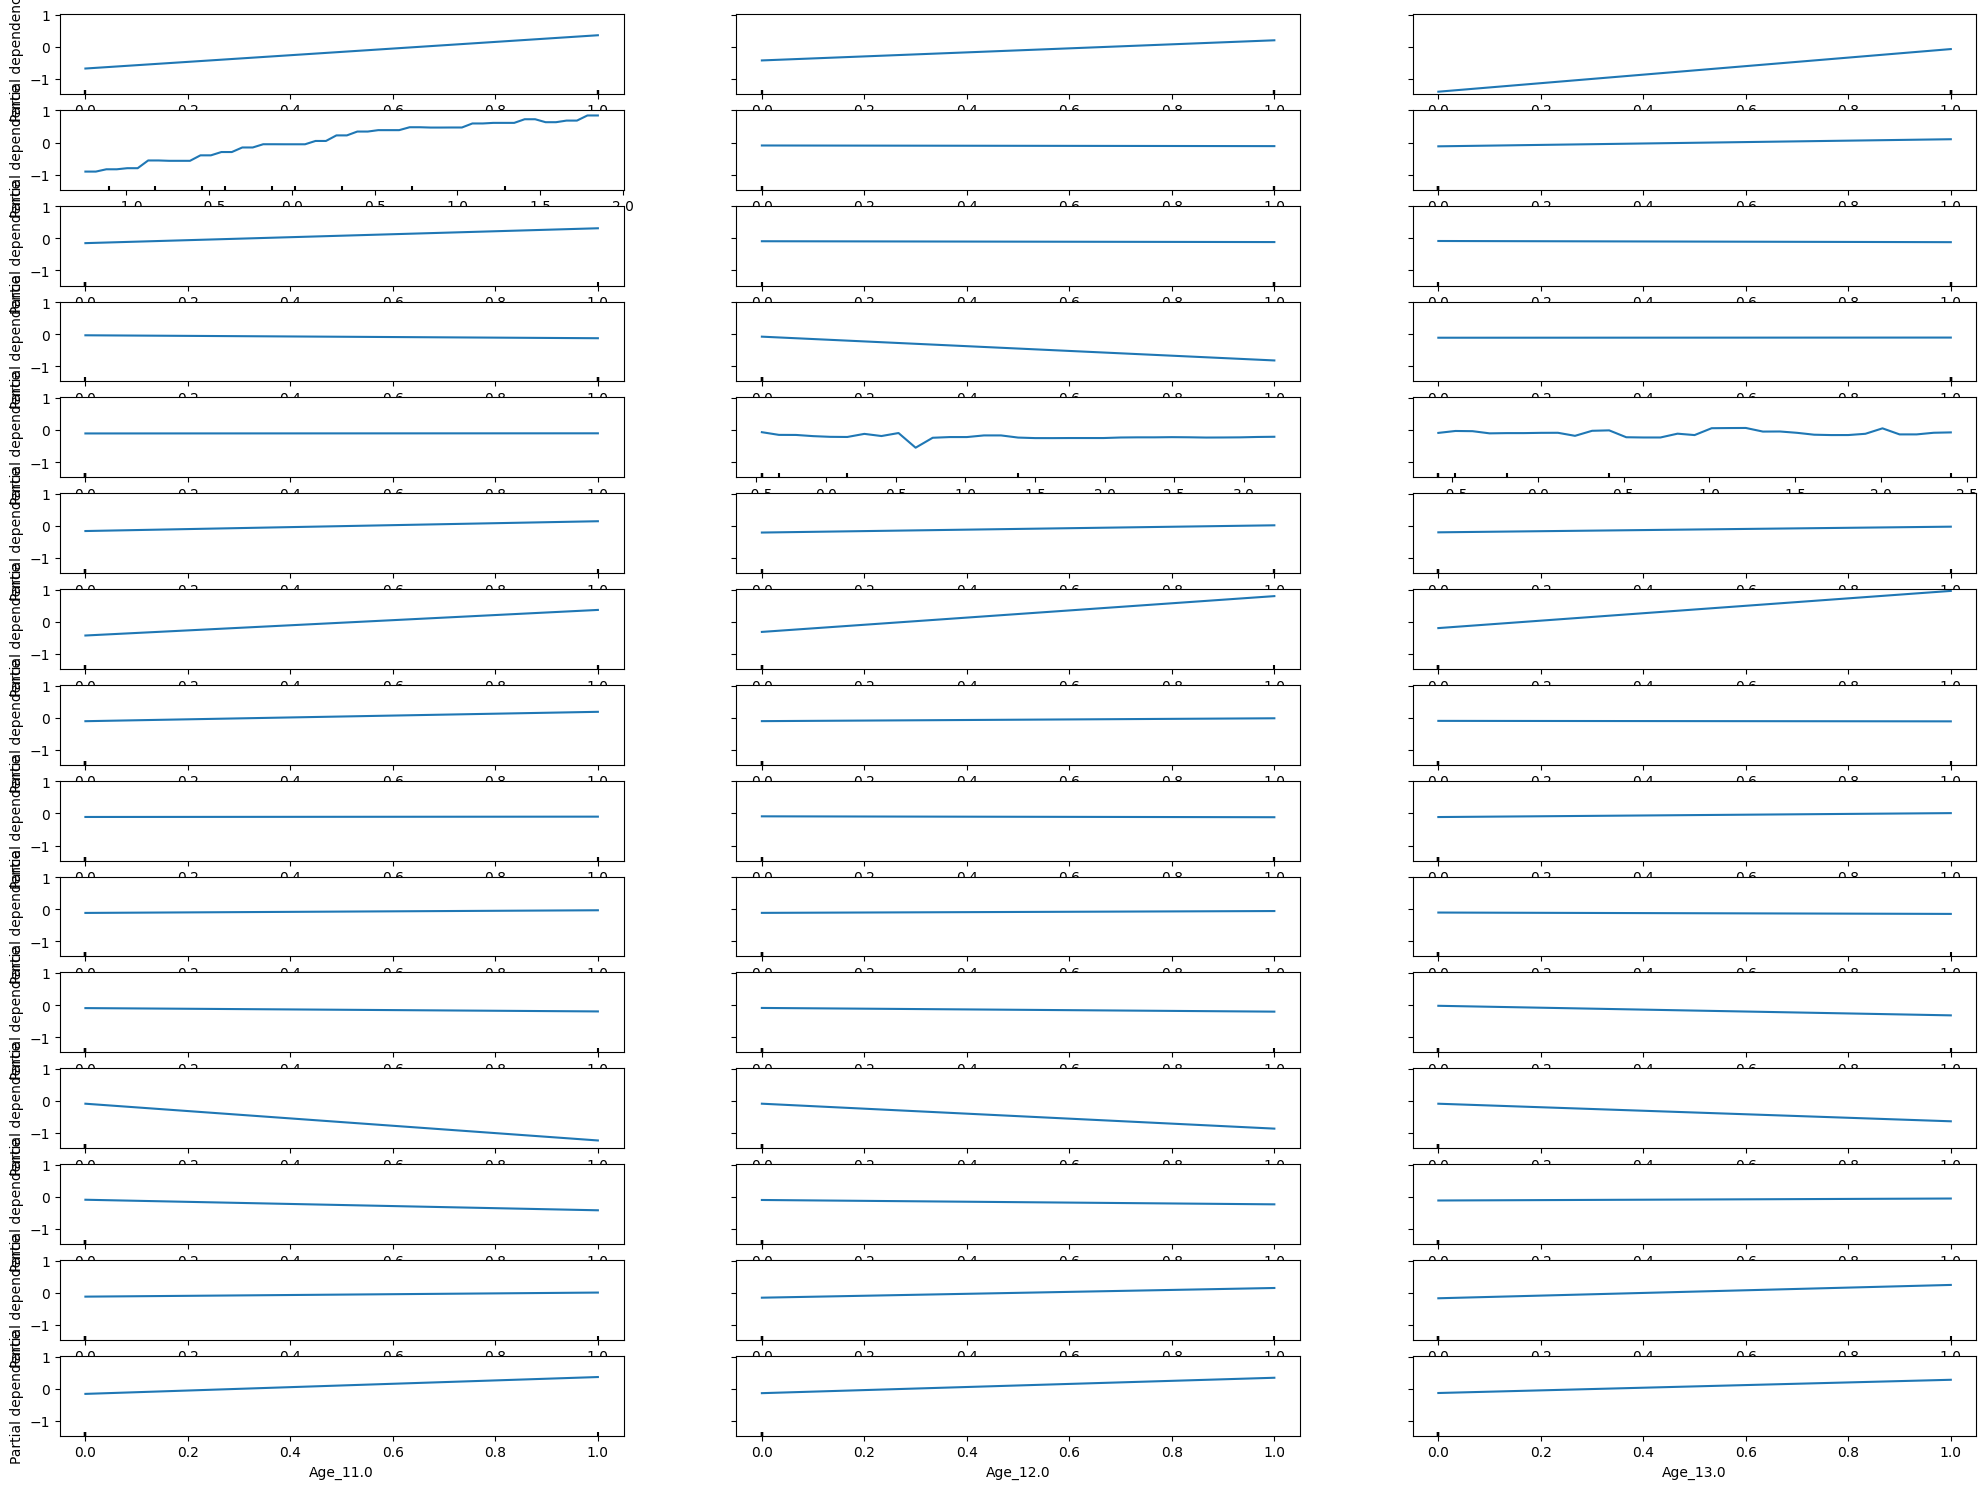

In [33]:
# Plot Partial Dependence for all features
features = X_train.columns
fig, ax = plt.subplots(figsize=(20, 15))  # Adjust the figure size as needed
PartialDependenceDisplay.from_estimator(model_gbm_optimized, X_train, features, grid_resolution=50, ax=ax)
plt.tight_layout()
plt.show()

### SHAP Values

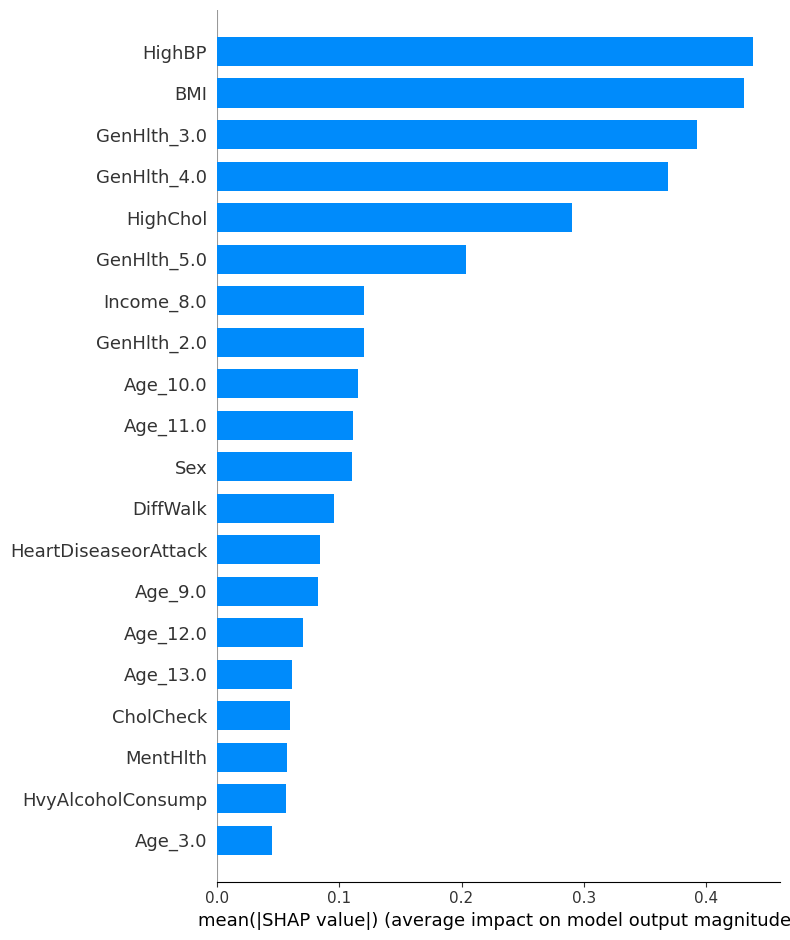

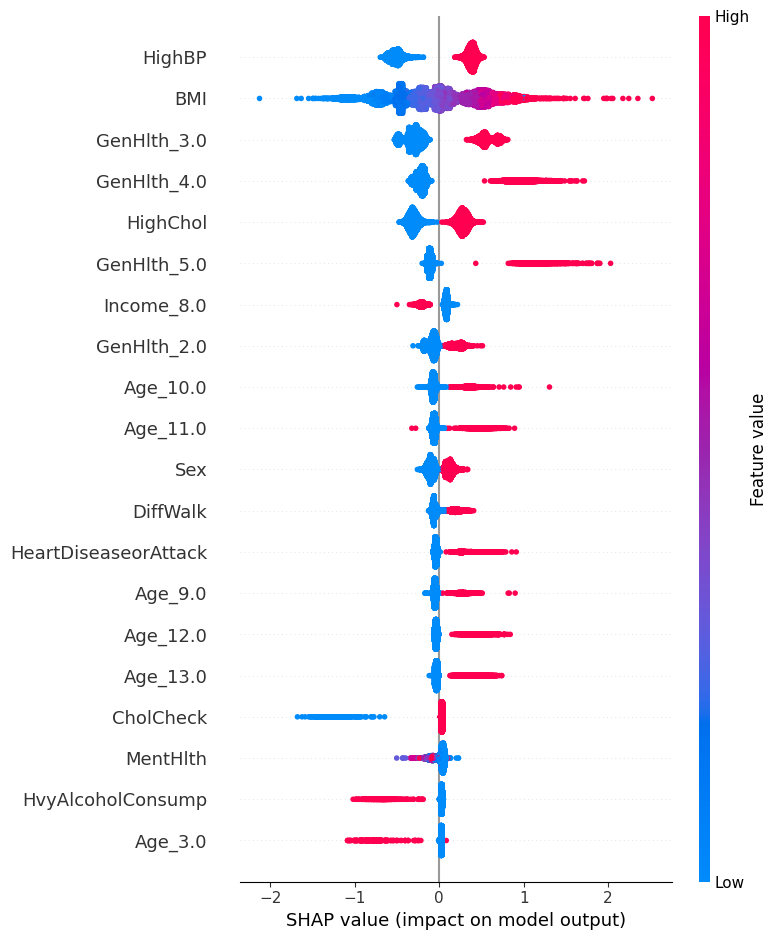

In [34]:
import shap

# Criar o objeto TreeExplainer do SHAP
explainer = shap.TreeExplainer(model_gbm_optimized)

# Calcular os valores SHAP com check_additivity=False
shap_values = explainer.shap_values(X_test, check_additivity=False)

# Visualização do impacto das features
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)